\pagebreak
\tableofcontents
\pagebreak

In [314]:
'''Importing Packages'''
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import datetime
from loess import loess_1d
from statsmodels.graphics.tsaplots import plot_acf
from openpyxl import Workbook, load_workbook
from sklearn import linear_model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from scipy.linalg import toeplitz
import math
import scipy.stats as stats
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

# Exercise 3.7 in the text: The quality of Pinot Noir wine is thought to be related to the properties of clarity, aroma, body, flavor, and oakiness. Data for 38 wines are given in Table E3.4.

In [315]:
'''Importing data'''
Pinot_data = pd.read_excel('PinotNoir.xlsx')

## Fit a multiple linear regression model relating wine quality to these predictors. Do not include the “Region” variable in the model.

In [316]:
Pinot_n_region = Pinot_data.drop(['Region'], axis=1)

X = Pinot_n_region[['x1','x2','x3','x4','x5']]
y = Pinot_n_region['y']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
summary = est.summary(title='Regression Results Pinot (Table 1)')

## Test for significance of regression. What conclusions can you draw?

In [318]:
md(summary.as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.721   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.677   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     16.51   \\
\textbf{Date:}             & Tue, 20 Sep 2022 & \textbf{  Prob (F-statistic):} &  4.70e-08   \\
\textbf{Time:}             &     23:54:28     & \textbf{  Log-Likelihood:    } &   -56.378   \\
\textbf{No. Observations:} &          38      & \textbf{  AIC:               } &     124.8   \\
\textbf{Df Residuals:}     &          32      & \textbf{  BIC:               } &     134.6   \\
\textbf{Df Model:}         &           5      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} &       3.9969  &        2.232     &     1.791  &         0.083        &       -0.549    &        8.543     \\
\textbf{x1}    &       2.3395  &        1.735     &     1.349  &         0.187        &       -1.194    &        5.873     \\
\textbf{x2}    &       0.4826  &        0.272     &     1.771  &         0.086        &       -0.072    &        1.038     \\
\textbf{x3}    &       0.2732  &        0.333     &     0.821  &         0.418        &       -0.404    &        0.951     \\
\textbf{x4}    &       1.1683  &        0.304     &     3.837  &         0.001        &        0.548    &        1.789     \\
\textbf{x5}    &      -0.6840  &        0.271     &    -2.522  &         0.017        &       -1.236    &       -0.132     \\
\bottomrule
\end{tabular}
\begin{tabular}{lclc}
\textbf{Omnibus:}       &  1.181 & \textbf{  Durbin-Watson:     } &    0.837  \\
\textbf{Prob(Omnibus):} &  0.554 & \textbf{  Jarque-Bera (JB):  } &    1.020  \\
\textbf{Skew:}          & -0.384 & \textbf{  Prob(JB):          } &    0.601  \\
\textbf{Kurtosis:}      &  2.770 & \textbf{  Cond. No.          } &     134.  \\
\bottomrule
\end{tabular}
%\caption{Regression Results Pinot (Table 1)}
\end{center}

Notes: \newline
 [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

From Table $1$ above we can see that the F-Stat probability shows signifigance but the $R^2$ does not show the greatest fit. We can see that DW test is closer to $0$ and thus shows that there is a posibility of auto correlation of the residuals. We can also see that the JB test is showing normality. 

## Use t-tests to assess the contribution of each predictor to the model. Discuss your findings.

In [319]:
t_stats = []
p_values = []
for i in Pinot_n_region.columns.tolist()[:-1]:
    x_ = Pinot_n_region[i]
    ttest = stats.ttest_1samp(x_, popmean=0)
    t_stats.append(ttest.statistic)
    p_values.append(ttest.pvalue)

beta_t_test_df = pd.DataFrame(index = 
    [r'$\beta_1$',r'$\beta_2$',r'$\beta_3$',r'$\beta_4$', r'$\beta_5$'],
    columns= ['stastistic', 'p-values']
    )
beta_t_test_df['stastistic'] = t_stats
beta_t_test_df['p-values'] = p_values
md('''
{}

{}

'''.format(r'$$\text{Table 2}$$',beta_t_test_df.to_markdown()))


$$\text{Table 2}$$

|           |   stastistic |    p-values |
|:----------|-------------:|------------:|
| $\beta_1$ |      45.9283 | 3.11551e-34 |
| $\beta_2$ |      27.6045 | 2.749e-26   |
| $\beta_3$ |      35.0371 | 5.57985e-30 |
| $\beta_4$ |      28.5935 | 7.91129e-27 |
| $\beta_5$ |      35.5418 | 3.33646e-30 |



Here are saying that $H_0: \beta_i = 0$ and $H_1: \beta_i \ne 0$. From the table above we can see all coefficients and thus variables have a significant effect on the model. 

## Analyze the residuals from this model. Is the model adequate?

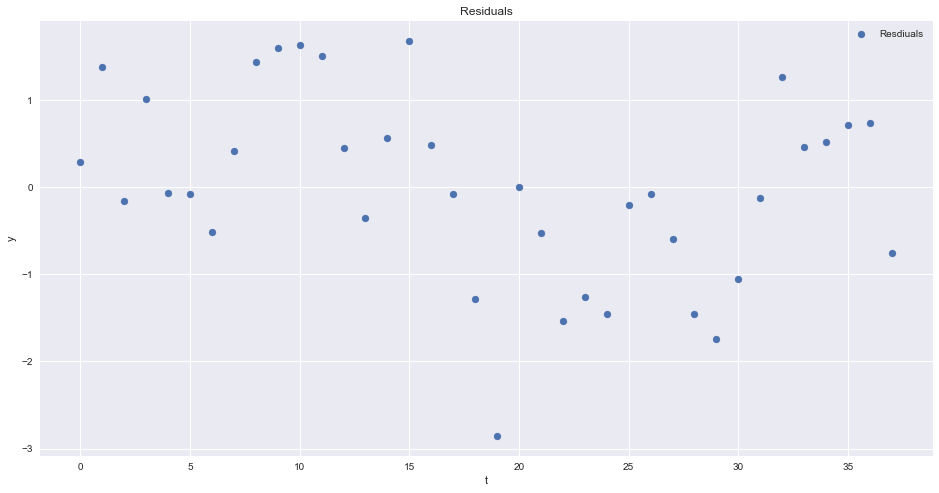

In [320]:
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(16,8))
    ax = plt.axes()
    plt.scatter([i for i in range(len(Pinot_data))],est.resid, label = 'Resdiuals')
    ax.set_xlabel('t')
    ax.set_ylabel('y')
    plt.title('Residuals')
    plt.legend()
    plt.show()

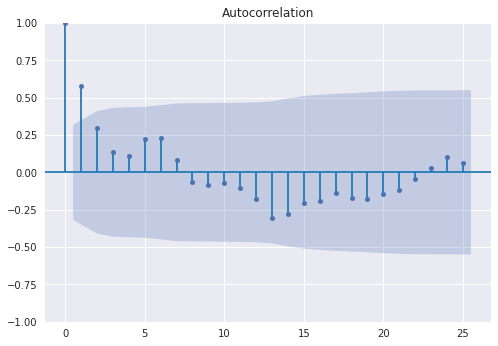

In [321]:
with plt.style.context('seaborn'):
    fig = plot_acf(est.resid, lags=25)

From Table 1 we can see that that JB test shows possible normality but there seems to be autocorrelation in the DW test yet in the ACF generated above it would shows decay which would lead us to beleive that there is non. 

## Calculate $R^2$ and the adjusted $R^2$ for this model. Compare these values to the $R^2$ and adjusted $R^2$ for the linear regression model relating wine quality to only the predictors “Aroma” and “Flavor.” Discuss your results.

In [322]:
'''Fitting the secondary model proposed'''
X = Pinot_n_region[['x2','x4']]
y = Pinot_n_region['y']

X = sm.add_constant(X)
est_2 = sm.OLS(y, X).fit()
summary = est_2.summary(title='Regression Results Pinot Aroma and Flavor (Table 3)')

In [323]:
md(summary.as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.659   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.639   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     33.75   \\
\textbf{Date:}             & Tue, 20 Sep 2022 & \textbf{  Prob (F-statistic):} &  6.81e-09   \\
\textbf{Time:}             &     23:54:29     & \textbf{  Log-Likelihood:    } &   -60.188   \\
\textbf{No. Observations:} &          38      & \textbf{  AIC:               } &     126.4   \\
\textbf{Df Residuals:}     &          35      & \textbf{  BIC:               } &     131.3   \\
\textbf{Df Model:}         &           2      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} &       4.3462  &        1.009     &     4.307  &         0.000        &        2.298    &        6.395     \\
\textbf{x2}    &       0.5180  &        0.276     &     1.877  &         0.069        &       -0.042    &        1.078     \\
\textbf{x4}    &       1.1702  &        0.291     &     4.027  &         0.000        &        0.580    &        1.760     \\
\bottomrule
\end{tabular}
\begin{tabular}{lclc}
\textbf{Omnibus:}       &  0.321 & \textbf{  Durbin-Watson:     } &    0.869  \\
\textbf{Prob(Omnibus):} &  0.852 & \textbf{  Jarque-Bera (JB):  } &    0.499  \\
\textbf{Skew:}          &  0.076 & \textbf{  Prob(JB):          } &    0.779  \\
\textbf{Kurtosis:}      &  2.460 & \textbf{  Cond. No.          } &     35.8  \\
\bottomrule
\end{tabular}
%\caption{Regression Results Pinot Aroma and Flavor (Table 3)}
\end{center}

Notes: \newline
 [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Refer to Table 1 and Table 2.

We can see from both tables the model using more predictors has a higher $R^2$ and adjusted $R^2$ than that of the one with only two predictor variables. This is most likely due to the fact that the Oakiness variables which was left out had a better p-value than Aroma. Thus we are removing more insignificant predictor variables but also taking a significant predictor with it. Also leaving a non-significant predictor varibale in the training data. 

## Find a $95\%$ CI for the regression coefficient for “Flavor” for both models in part e. Discuss any differences.

We can see from table 1 and 2 that the 95% CI for Flavor is $(0.548, 1.789)$ and $(0.580, 1.760)$ respectively. 

# Given a process $y_T = \beta_0 + \beta_1t + \epsilon_t$, $\epsilon_t \stackrel{uncorr.}{\sim} (0,\sigma^2)$. Show that the second-order exponentially smoothed estimate, $\hat{y}_T = 2\tilde{y}_T^{(1)} - \tilde{y}_T^{(2)}$ (as in the equation (4.23) of the text), is an unbiased estimate of $\mathbb{E}(y_T)$.

We are asked to show $\hat{y}_T$ is unbiased estimate of $\mathbb{E}[y_T]$. To do this we will show $\mathbb{E}[\hat{y}_T]$ = $\mathbb{E}[y_T]$.

$$
\begin{split}
\mathbb{E}[\hat{y}_T] &= 2\mathbb{E}[\tilde{y}_T^{(1)}] - \mathbb{E}[\tilde{y}_T^{(2)}] \\
\\
&= 2\mathbb{E}[\tilde{y}_T^{(1)}] - \mathbb{E}[\tilde{y}_T^{(1)}] + \frac{1-\lambda}{\lambda}\beta_1\\
\\
&= \mathbb{E}[\tilde{y}_T^{(1)}] + \frac{1-\lambda}{\lambda}\beta_1\\
\\
&= \mathbb{E}[y_T]  - \frac{1-\lambda}{\lambda}\beta_1 + \frac{1-\lambda}{\lambda}\beta_1\\
\\
\mathbb{E}[\hat{y}_T]&= \mathbb{E}[y_T]\\
\\
\end{split}
$$

This shows that the expectation of the exponentially smoothed process is an unbiaed estimate of the given process.

# (Example 4.2) Referring to the dataset, CPI.xlsx, posted in HW03 link on coursesite,

In [324]:
'''importing data'''

CPI_data = pd.read_excel('CPI.xlsx')

'''Fixing Data'''
df_0 = CPI_data[['Month', 'CPI']]
df_0 = df_0.set_index('Month')
df_1 = CPI_data[['Month.1', 'CPI.1']]
df_1.columns = ['Month', 'CPI']
df_1 = df_1.set_index('Month')
df_2 = CPI_data[['Month.2', 'CPI.2']]
df_2.columns = ['Month', 'CPI']
df_2 = df_2.set_index('Month')
df_3 = CPI_data[['Month.3', 'CPI.3']]
df_3.columns = ['Month', 'CPI']
df_3 = df_3.set_index('Month')
df_4 = CPI_data[['Month.4', 'CPI.4']]
df_4.columns = ['Month', 'CPI']
df_4 = df_4.set_index('Month')

CPI_data_cleaned = pd.concat([df_0,df_1,df_2,df_3,df_4])

## Visualize the series by generating the time-series plot for "CPI" series that is to be indexed by "Month"series. Comment on whether there exists a linear trend.

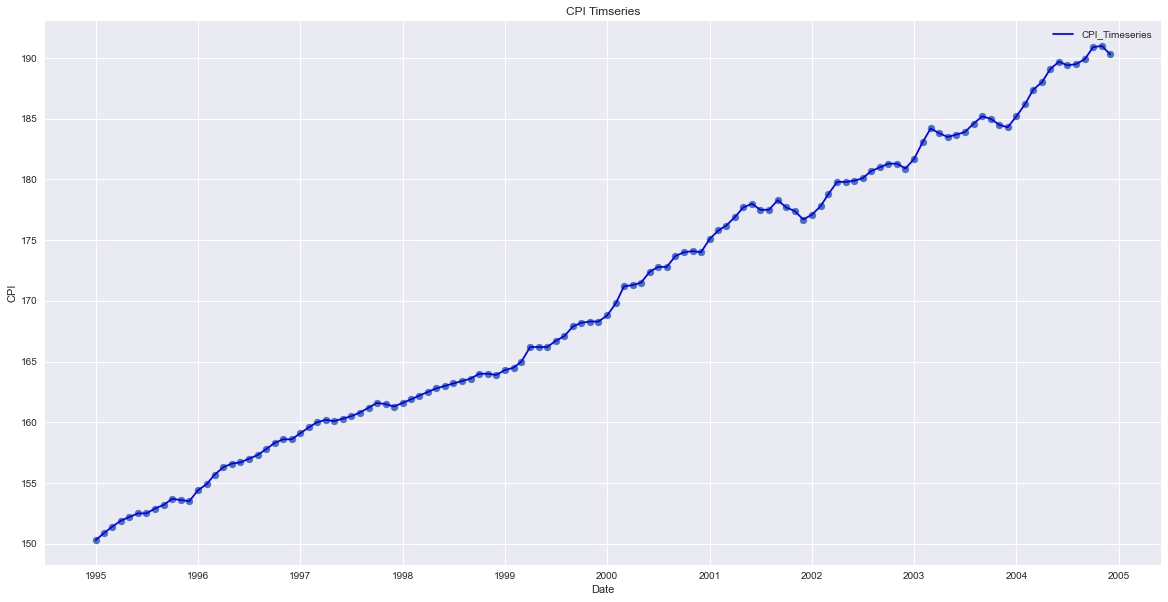

In [326]:
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes()
    plt.plot(CPI_data_cleaned, c = 'Blue', label = 'CPI_Timeseries')
    plt.scatter(CPI_data_cleaned.index, CPI_data_cleaned['CPI'])
    ax.set_xlabel('Date')
    ax.set_ylabel('CPI')
    plt.title('CPI Timseries')
    plt.legend()
    plt.show()

### Comments:

There seems to be a positive linear trend.

## Find and plot the first-order exponentially smoothed estimates (using $\tilde{y}^{(1)}_0 = y_1, \lambda = 0.3$) overlapped with the original series. Comment on the fitness of the first-order exponential smoother on the CPI series.

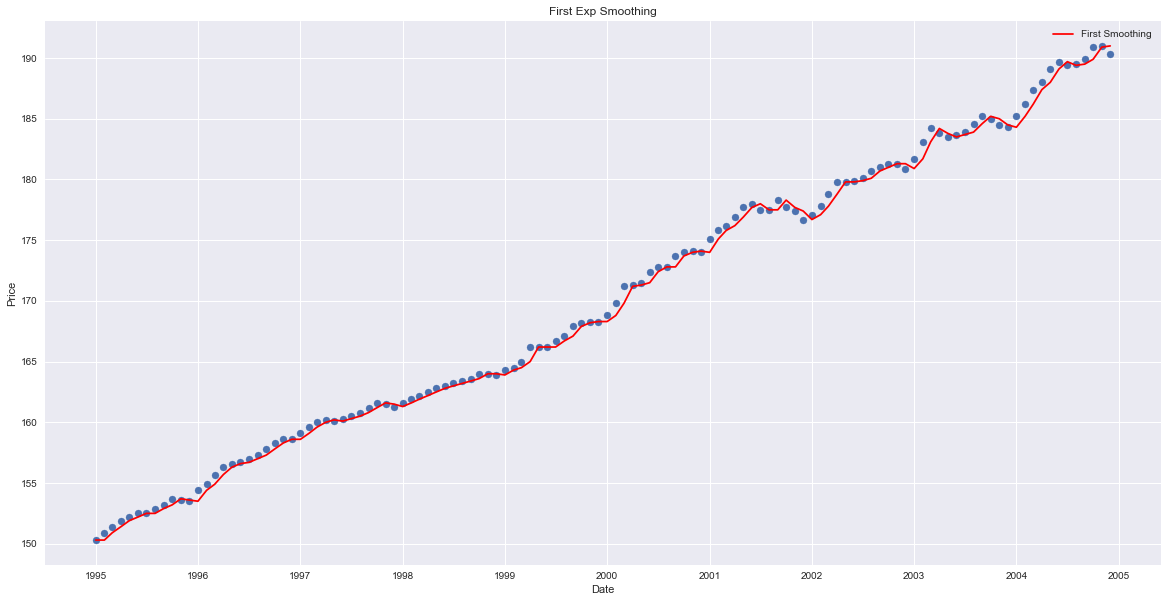

In [327]:
fit1 = ExponentialSmoothing(CPI_data_cleaned.values, initialization_method="heuristic", use_boxcox = 0.3).fit()
CPI_data_cleaned_fitted = CPI_data_cleaned
CPI_data_cleaned_fitted['fitted'] = fit1.fittedvalues
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes()
    plt.plot(CPI_data_cleaned_fitted['fitted'], c = 'Red', label = 'First Smoothing')
    plt.scatter(CPI_data_cleaned.index, CPI_data_cleaned['CPI'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.legend()
    plt.title('First Exp Smoothing')
    plt.show()

## Find and plot the second-order exponentially smoothed estimates (using $\tilde{y}^{(1)}_0 = y_1, \tilde{y}^{(2)}_0 = \tilde{y}^{(1)}_0, \lambda = 0.3$) overlapped with the original series. Comment on the fitness of the first-order exponential smoother on the CPI series.

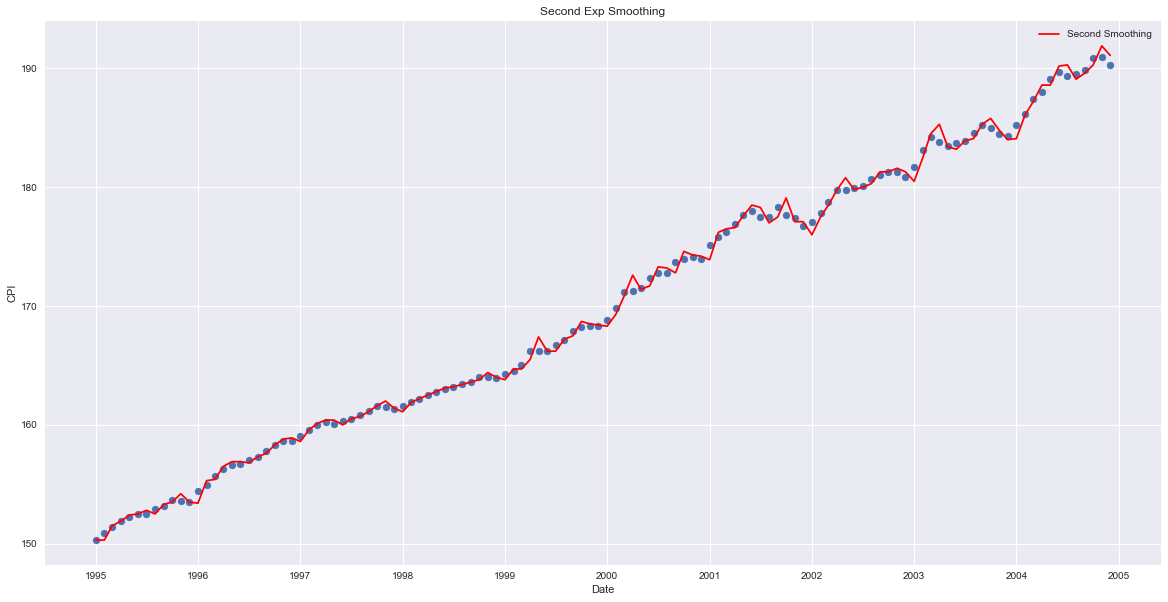

In [328]:
fit2 = ExponentialSmoothing(fit1.fittedvalues, initialization_method="heuristic", use_boxcox = 0.3).fit()

CPI_data_cleaned_fitted['fitted2'] = 2*fit1.fittedvalues - fit2.fittedvalues
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes()
    plt.plot(CPI_data_cleaned_fitted['fitted2'], c = 'Red', label = 'Second Smoothing')
    plt.scatter(CPI_data_cleaned.index, CPI_data_cleaned['CPI'])
    ax.set_xlabel('Date')
    ax.set_ylabel('CPI')
    plt.legend()
    plt.title('Second Exp Smoothing')
    plt.show()

### Comments
 It seems to capture the process better yet over estimates the positive variances when varainces increases in the process.

## Implement the second-order exponential smoother to incorporate (4.24) as a new function. Fit the function to the data with keeping $\lambda = 0.3$ and plot the new fit with original data. Comment on the comparison between this revised fit to the fit in (c).